<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
import requests
import io

# The URL you're trying to fetch data from
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Fetching the data using the requests library
response = requests.get(URL)

# Ensuring the request was successful
if response.status_code == 200:
    # If successful, wrap the content in a BytesIO object for similar handling as your approach
    boston_url = io.BytesIO(response.content)
else:
    print("Failed to fetch data:", response.status_code)

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [9]:
#getting familiar with the data
boston_df.head(1)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,4.98,24.0,between 35 and 70


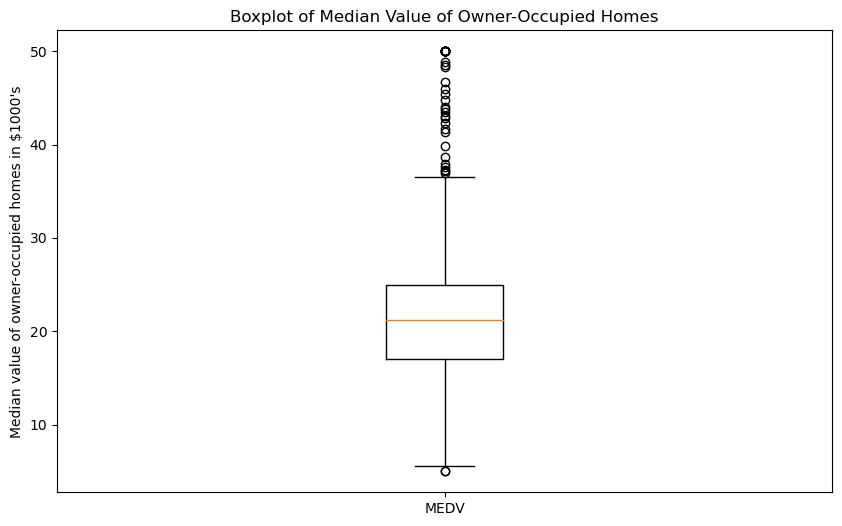

In [10]:
#A boxplot For the "Median value of owner-occupied homes": 
pyplot.figure(figsize=(10, 6))  
pyplot.boxplot(boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median value of owner-occupied homes in $1000\'s')
pyplot.xticks([1], ['MEDV']) 
pyplot.show()

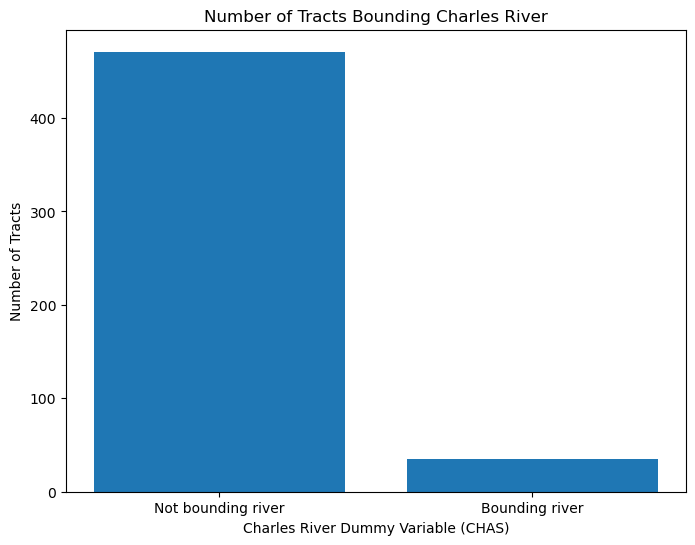

In [11]:
#first get counts for charles river variable
chas_counts = boston_df['CHAS'].value_counts()

# Create a bar plot for the CHAS column
pyplot.figure(figsize=(8, 6))  
pyplot.bar(chas_counts.index, chas_counts.values, tick_label=['Not bounding river', 'Bounding river'])
pyplot.title('Number of Tracts Bounding Charles River')
pyplot.xlabel('Charles River Dummy Variable (CHAS)')
pyplot.ylabel('Number of Tracts')
pyplot.show()

In [12]:
#Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [13]:
# Prepare the data for the boxplot
data_to_plot = [group['MEDV'] for name, group in boston_df.groupby('age_group')]

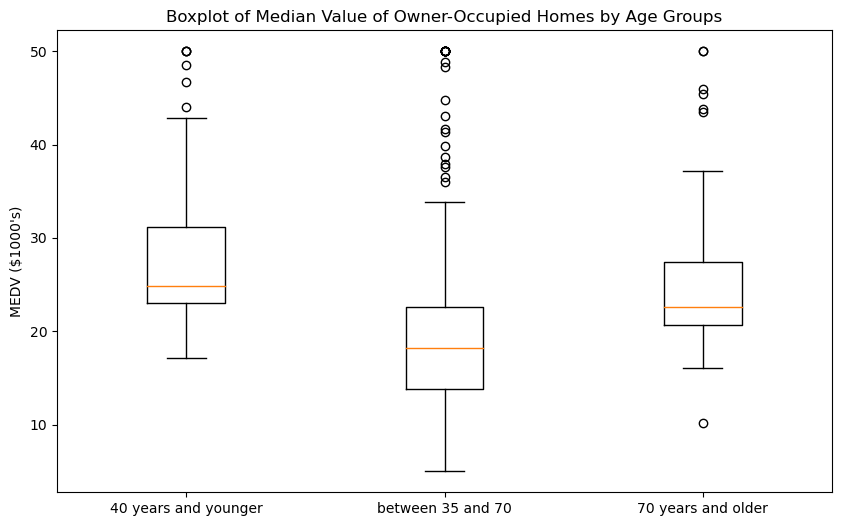

In [14]:
# Plotting MEDV variable vs age groups
pyplot.figure(figsize=(10, 6))
pyplot.boxplot(data_to_plot, labels=['40 years and younger', 'between 35 and 70', '70 years and older'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes by Age Groups')
pyplot.ylabel('MEDV ($1000\'s)')
pyplot.show()


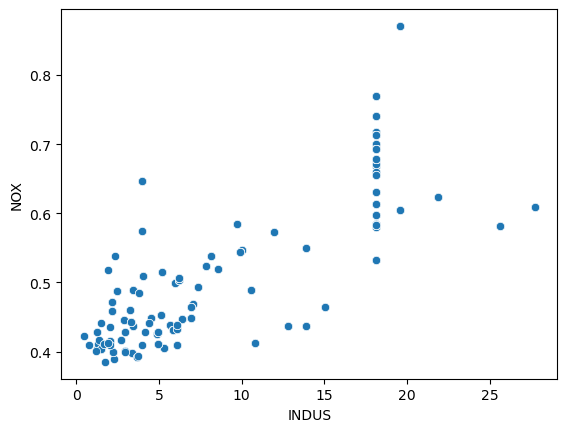

In [15]:
#catter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

/var/folders/4c/8sr_f5pd3gv8z780wg0pflvc0000gn/T/ipykernel_5161/3965863991.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['PTRATIO'], kde = False)


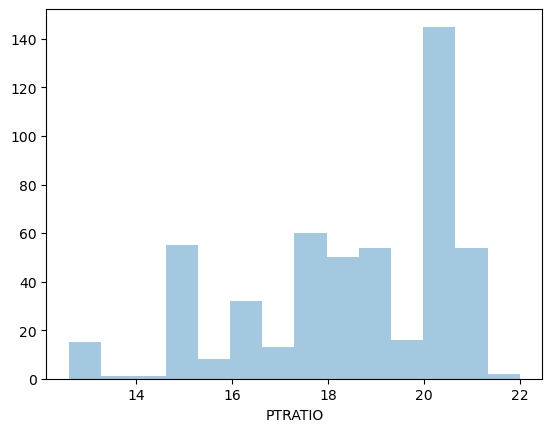

In [16]:
# histogram for the pupil to teacher ratio variable
ax = sns.distplot(boston_df['PTRATIO'], kde = False)

In [17]:
#TASK 3:

In [18]:
#first we check the homeogenetity of normallity
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [19]:
#then we run T-test (equal_var = False because p=0.003 for levene test)
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [20]:
#there is a significant difference in median value of houses bounded by the Charles river or not as we got p-value of less then 0.05

In [21]:
#first we check the homeogenetity of normallity
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], center='mean' )

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [22]:
#We assign groups into variables:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
        

In [23]:
#now we run ANOVA:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [24]:
# We got a p-value smaller than 0.005 so there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

In [25]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])


PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061236247e-98)

In [26]:
'''
there is a relationship between Nitric oxide concentrations and proportion
of non-retail business acres per town (R of 0.76 with p-value of less than 0.05)
'''

'\nthere is a relationship between Nitric oxide concentrations and proportion\nof non-retail business acres per town (R of 0.76 with p-value of less than 0.05)\n'

In [27]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        15:35:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
'''
There is a statistically significant positive relationship between the weighted distance to the five Boston employment centres 
and the median value of owner-occupied homes. As the distance increases, the median home value also increases.

However, the low R-squared value suggests that DIS alone does not explain much of the variance in MEDV.
'''

'\nThere is a statistically significant positive relationship between the weighted distance to the five Boston employment centres \nand the median value of owner-occupied homes. As the distance increases, the median home value also increases.\n\nHowever, the low R-squared value suggests that DIS alone does not explain much of the variance in MEDV.\n'